In [16]:
import numpy as np
import pandas as pd
from sklearn.metrics import r2_score


class NeuralNetwork:
    def __init__(self, userdf, inputLayer, hiddenLayer, outputLayer, learningRate=0.01, hyperparam=0.01):
        self.inputLayer = inputLayer
        self.hiddenLayer = hiddenLayer
        self.outputLayer = outputLayer
        self.learningRate = learningRate
        self.hyperparam = hyperparam
        self.df = userdf
        self.weights = []
        self.biases = []
        self.netOutputs  = []
        self.postactivationOutputs = []
        self.predictions = []
        self.actualOutputs = []

    def leakyRELU(self, arr):
        return np.array([i if i>0 else self.hyperparam*i for i in arr])
    
    
    def extractInput(self, i):
        inputParams = np.array([self.df.iloc[i].petal_len, self.df.iloc[i].petal_wid, self.df.iloc[i].sepal_len, self.df.iloc[i].sepal_wid])
        self.actualOutputs.append(self.df.iloc[i]['target'])
        actualOutput = np.zeros(shape=(3))
        actualOutput[int(self.df.iloc[i]['target'])] = 1
        


        return inputParams, actualOutput
    
    def softmax(self, arr):
        exps = np.exp(arr - np.max(arr))  
        return exps / np.sum(exps)
    
    def backPropogation(self, pred, actual, inputs):
            
            dl_by_dzfinal = pred - actual.flatten()

            dl_by_dh = self.weights[1].T @ dl_by_dzfinal

            leaky_derviative_firstLayr = np.array([1 if val > 0 else self.hyperparam for val in self.netOutputs[0]])

            dl_by_dzh = dl_by_dh * leaky_derviative_firstLayr

            grad_w1 = np.outer(dl_by_dzh, inputs)
            grad_b1 = dl_by_dzh

            grad_w2 = np.outer(dl_by_dzfinal, self.postactivationOutputs[0])
            grad_b2 = dl_by_dzfinal

            self.weights[0] -= self.learningRate * grad_w1
            self.biases[0] -= self.learningRate * grad_b1
            self.weights[1] -= self.learningRate * grad_w2
            self.biases[1] -= self.learningRate * grad_b2

    def forwardBackwardPass(self, i):
        self.netOutputs = []
        self.postactivationOutputs = []
        inp = self.extractInput(i=i)

        output = self.feedForward(inp[0])

        pred = self.softmax(output)
        self.predictions.append(np.argmax(pred))

        self.backPropogation(pred=pred, actual=inp[1], inputs=inp[0])




    def learn(self):
        for i in range(len(self.df)):
            
                
  
            
            self.forwardBackwardPass(i=i)

    def feedForward(self, inputVal):

        r1 = inputVal @self.weights[0].T + self.biases[0]
        a1 = self.leakyRELU(r1)

        self.netOutputs.append(r1)
        self.postactivationOutputs.append(a1)

        r2 = a1 @ self.weights[1].T + self.biases[1]


        
        self.netOutputs.append(r2)


        return r2

    
    def NN_init(self):
        self.predictions = []
        self.actualOutputs = []

        w1 = np.random.rand(self.hiddenLayer, self.inputLayer)
        w2 = np.random.rand(self.outputLayer, self.hiddenLayer)

        self.weights.append(w1)
        self.weights.append(w2)

        z1 = np.zeros(shape=(self.hiddenLayer))
        z2 = np.zeros(shape=(self.outputLayer))
        self.biases.append(z1)
        self.biases.append(z2)

        
df = pd.read_csv('../data/modified_iris.csv')


NN = NeuralNetwork(df, 4, 10, 3)
NN.NN_init()

NN.learn()




In [17]:
hiddenNodes = [i for i in range(30)]
accuracies = []

for i in hiddenNodes:
    NN = NeuralNetwork(df, 4, i, 3)
    NN.NN_init()

    NN.learn()
    accuracies.append(r2_score(NN.predictions, NN.actualOutputs))

In [18]:
accuracies

[-0.7923362175525337,
 0.9013157894736842,
 0.9182783982566058,
 0.9494097807757167,
 0.9494643218111987,
 0.9504132231404959,
 0.9484500652965839,
 0.9387588459444747,
 0.9799946652440651,
 0.9696949289514445,
 0.94,
 0.9696949289514445,
 0.9799946652440651,
 0.9799946652440651,
 0.9292881675533706,
 0.9799946652440651,
 0.8999733262203254,
 0.94,
 0.9292881675533706,
 0.9799946652440651,
 0.9799946652440651,
 0.94,
 0.9696949289514445,
 0.8888215079846371,
 0.94,
 0.9306884942900522,
 0.9799946652440651,
 0.9799946652440651,
 0.9799946652440651,
 0.9696949289514445]

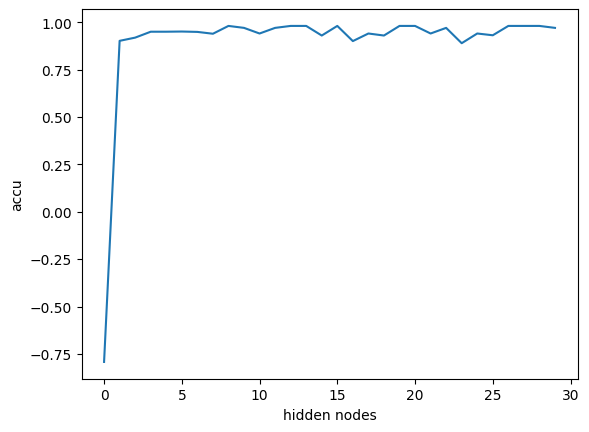

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.plot(hiddenNodes, accuracies)
plt.xlabel('hidden nodes')
plt.ylabel('accu')
plt.show()

In [21]:
learningRate = [0.005, 0.01, 0.02, 0.05, 0.08, 0.1, 0.2, 0.5]
accu_learning = []

for i in learningRate:
    NN = NeuralNetwork(df, 4, 10, 3, learningRate=i)
    NN.NN_init()

    NN.learn()
    accu_learning.append(r2_score(NN.predictions, NN.actualOutputs))

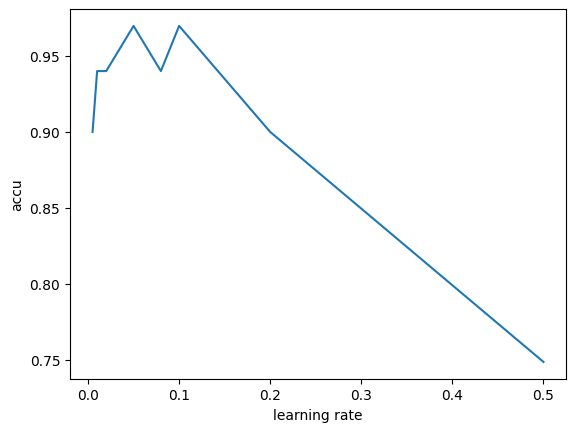

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.plot(learningRate, accu_learning)
plt.xlabel('learning rate')
plt.ylabel('accu')
plt.show()

In [35]:
hyper = [0.001, 0.005, 0.01, 0.02, 0.05, 0.08, 0.1, 0.2, 0.5, 0.8]
hyper_accu = []

for i in hyper:
    NN = NeuralNetwork(df, 4, 10, 3, hyperparam=i)
    NN.NN_init()

    NN.learn()
    hyper_accu.append(r2_score(NN.predictions, NN.actualOutputs))

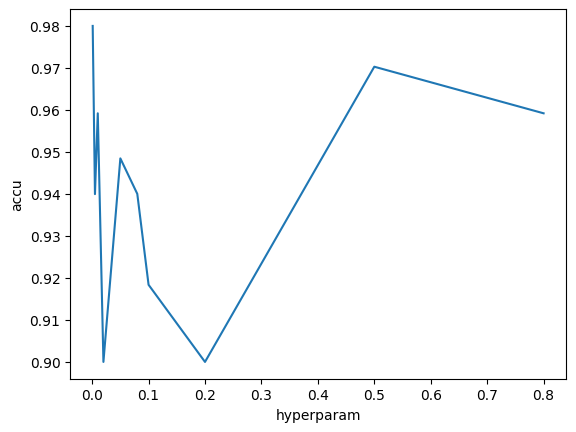

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.plot(hyper, hyper_accu)
plt.xlabel('hyperparam')
plt.ylabel('accu')
plt.show()